In [25]:
# tool
import pandas as pd
import matplotlib.pyplot as plt

# data
from neuralforecast.utils import AirPassengersDF

# models
from neuralforecast.auto import AutoNHITS

# forecast
from neuralforecast.core import NeuralForecast

# loss
from neuralforecast.losses.pytorch import MAE

import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)  # disable training prints

import warnings
warnings.filterwarnings("ignore")

# data

In [2]:
Y_df = AirPassengersDF
print(Y_df.head())
print()
print(Y_df.shape)
print()
print(Y_df["unique_id"].value_counts())

   unique_id         ds      y
0        1.0 1949-01-31  112.0
1        1.0 1949-02-28  118.0
2        1.0 1949-03-31  132.0
3        1.0 1949-04-30  129.0
4        1.0 1949-05-31  121.0

(144, 3)

1.0    144
Name: unique_id, dtype: int64


# hypteparameters grid

## 默认超参数网格

In [5]:
nhits_default_config = AutoNHITS.get_default_config(h = 12, backend = "optuna")

def config_nhits(trial):
    config = {
        **nhits_default_config(trial)
    }
    config.update({
        "random_seed": trial.suggest_int("random_seed", 1, 10),
        "n_pool_kernel_size": trial.suggest_categorical("n_pool_kernel_size", [[2, 2, 2], [16, 8, 1]]),
    })

    return config

## 自定超参数网格

In [7]:
def config_nhits(trial):
    return {
        "max_steps": 100,  # Number of SGD steps
        "input_size": 24,  # Size of input window
        "learning_rate": trial.suggest_loguniform(
            "learning_rate", 
            1e-5, 1e-1
        ),  # Initial Learning rate
        "n_pool_kernel_size": trial.suggest_categorical(
            "n_pool_kernel_size", 
            [[2, 2, 2], [16, 8, 1]]
        ),  # MaxPool's Kernelsize
        "n_freq_downsample": trial.suggest_categorical(
            "n_freq_downsample",
            [[168, 24, 1], [24, 12, 1], [1, 1, 1]]
        ),  # Interpolation expressivity ratios
        "val_check_steps": 50,  # Compute validation every 50 steps
        "random_seed": trial.suggest_int(
            "random_seed", 
            1, 10
        ),  # Random seed
    }

# model

In [11]:
model = AutoNHITS(
    h = 12,
    loss = MAE(),
    config = config_nhits,
    search_alg = optuna.samplers.TPESampler(),
    backend = "optuna",
    num_samples = 10,
)

# model training

In [15]:
nf = NeuralForecast(models = [model], freq = "M")
nf.fit(df = Y_df, val_size = 24)

Global seed set to 1
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.698     Total estimated model p

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Global seed set to 8
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M   

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Global seed set to 3
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M   

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Global seed set to 6
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M   

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Global seed set to 1
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M   

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Global seed set to 9
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M   

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Global seed set to 5
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M   

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Global seed set to 9
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M   

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Global seed set to 9
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M   

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Global seed set to 4
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M   

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Global seed set to 1
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M   

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.


In [17]:
results = nf.models[0].results.trials_dataframe()
results.drop(columns = "user_attrs_ALL_PARAMS")

,number,value,datetime_start,datetime_complete,duration,params_learning_rate,params_n_freq_downsample,params_n_pool_kernel_size,params_random_seed,user_attrs_METRICS,state
0,0,25.150272,2024-11-07 21:50:16.297624,2024-11-07 21:50:17.704876,0 days 00:00:01.407252,0.006072,"[168, 24, 1]","[16, 8, 1]",1,"{'loss': tensor(25.1503), 'train_loss': tensor...",COMPLETE
1,1,40.481033,2024-11-07 21:50:17.704876,2024-11-07 21:50:18.885907,0 days 00:00:01.181031,0.000052,"[168, 24, 1]","[16, 8, 1]",8,"{'loss': tensor(40.4810), 'train_loss': tensor...",COMPLETE
2,2,21.388981,2024-11-07 21:50:18.885907,2024-11-07 21:50:20.053577,0 days 00:00:01.167670,0.000198,"[168, 24, 1]","[2, 2, 2]",3,"{'loss': tensor(21.3890), 'train_loss': tensor...",COMPLETE
3,3,25.905972,2024-11-07 21:50:20.054574,2024-11-07 21:50:21.254706,0 days 00:00:01.200132,0.000138,"[24, 12, 1]","[16, 8, 1]",6,"{'loss': tensor(25.9060), 'train_loss': tensor...",COMPLETE
4,4,20.471020,2024-11-07 21:50:21.254706,2024-11-07 21:50:22.522241,0 days 00:00:01.267535,0.000388,"[168, 24, 1]","[2, 2, 2]",1,"{'loss': tensor(20.4710), 'train_loss': tensor...",COMPLETE
5,5,20.839844,2024-11-07 21:50:22.522241,2024-11-07 21:50:23.692450,0 days 00:00:01.170209,0.000854,"[1, 1, 1]","[16, 8, 1]",9,"{'loss': tensor(20.8398), 'train_loss': tensor...",COMPLETE
6,6,58.370430,2024-11-07 21:50:23.692450,2024-11-07 21:50:24.932163,0 days 00:00:01.239713,0.014507,"[24, 12, 1]","[2, 2, 2]",5,"{'loss': tensor(58.3704), 'train_loss': tensor...",COMPLETE
7,7,21.707628,2024-11-07 21:50:24.932163,2024-11-07 21:50:26.405233,0 days 00:00:01.473070,0.000819,"[1, 1, 1]","[16, 8, 1]",9,"{'loss': tensor(21.7076), 'train_loss': tensor...",COMPLETE
8,8,23.639334,2024-11-07 21:50:26.406230,2024-11-07 21:50:27.818513,0 days 00:00:01.412283,0.000243,"[1, 1, 1]","[16, 8, 1]",9,"{'loss': tensor(23.6393), 'train_loss': tensor...",COMPLETE
9,9,48.065800,2024-11-07 21:50:27.818513,2024-11-07 21:50:29.112569,0 days 00:00:01.294056,0.008306,"[24, 12, 1]","[16, 8, 1]",4,"{'loss': tensor(48.0658), 'train_loss': tensor...",COMPLETE


# model predicting

In [24]:
Y_hat_df_optuna = nf.predict()
Y_hat_df_optuna = Y_hat_df_optuna.reset_index()
Y_hat_df_optuna

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

,unique_id,ds,AutoNHITS
0,1.0,1961-01-31,450.513672
1,1.0,1961-02-28,461.746307
2,1.0,1961-03-31,485.592621
3,1.0,1961-04-30,495.922333
4,1.0,1961-05-31,521.402161
5,1.0,1961-06-30,596.199158
6,1.0,1961-07-31,671.630005
7,1.0,1961-08-31,672.781433
8,1.0,1961-09-30,590.501587
9,1.0,1961-10-31,497.463196


# result

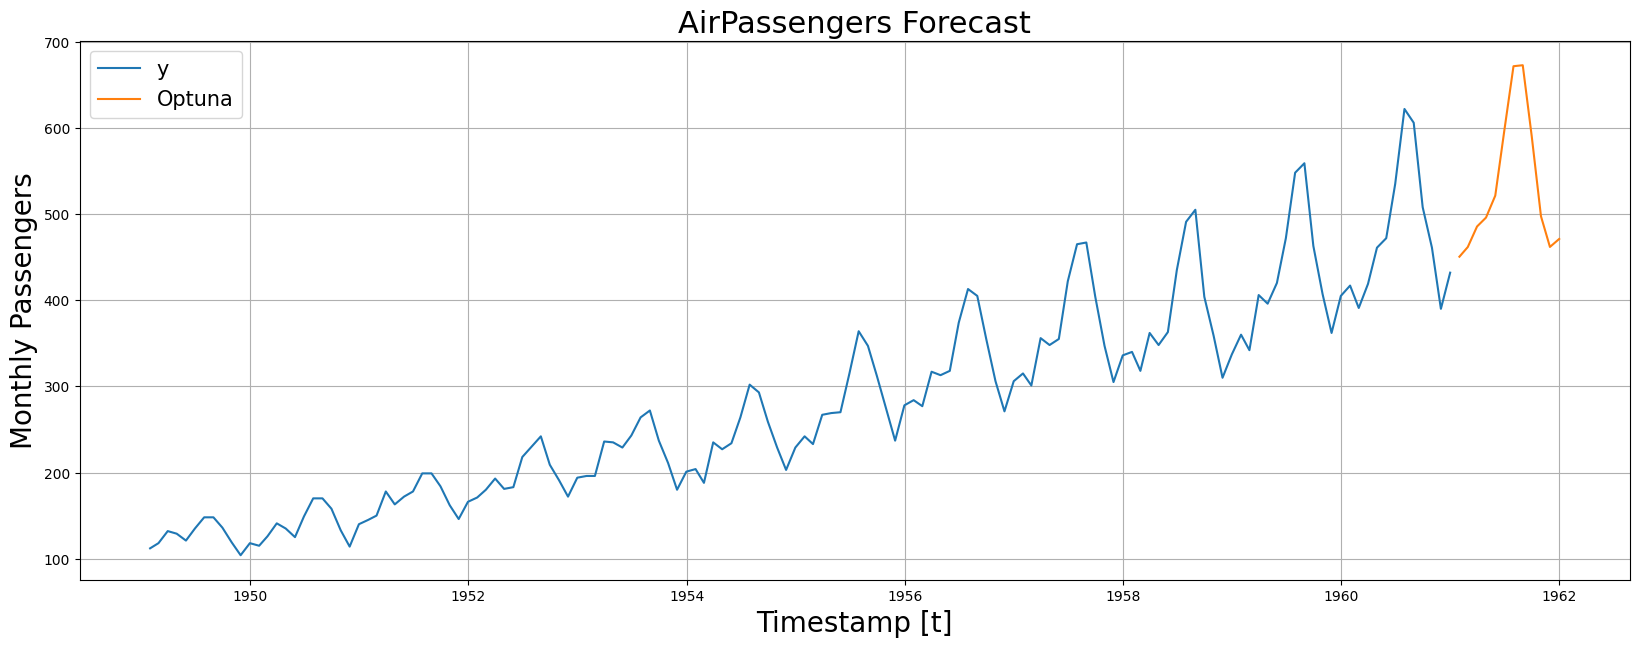

In [29]:
plot_df = pd.concat([
    Y_df,
    # Y_hat_ray,
    Y_hat_df_optuna,
]).reset_index()

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plt.plot(plot_df['ds'], plot_df['y'], label='y')
# plt.plot(plot_df['ds'], plot_df['AutoNHITS'], label='Ray')
plt.plot(Y_hat_df_optuna['ds'], Y_hat_df_optuna['AutoNHITS'], label='Optuna')
ax.set_title('AirPassengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()